In [2]:
print(1)

1


sample: 100%|██████████| 1500/1500 [00:00<00:00, 1821.15it/s, 3 steps of size 1.00e+00. acc. prob=0.92]


<Axes: title={'center': 'p'}>

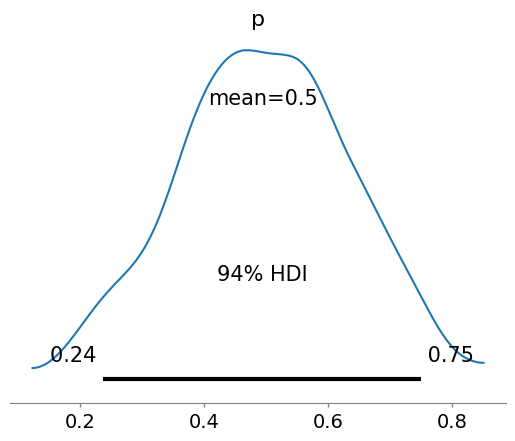

In [4]:
import numpyro
import numpyro.distributions as dist
from numpyro.infer import MCMC, NUTS
import jax
import jax.numpy as jnp
import arviz as az

# モデルの定義
def coin_flip_model(data=None):
    # コインが表になる確率pに一様事前分布を設定
    p = numpyro.sample("p", dist.Uniform(0, 1))
    # 観測データに基づく尤度関数
    with numpyro.plate("data", len(data)):
        numpyro.sample("obs", dist.Bernoulli(p), obs=data)

# 観測データ（コイン投げの結果）
data = jnp.array([1, 0, 1, 1, 0, 0, 0, 0, 1, 1])

# MCMCの設定
kernel = NUTS(coin_flip_model)
mcmc = MCMC(kernel, num_warmup=500, num_samples=1000)

# サンプリングの実行
rng_key = jax.random.PRNGKey(0)
mcmc.run(rng_key, data=data)

# 結果の取得
samples = mcmc.get_samples()

# 事後分布のプロット
az.plot_posterior(samples, var_names=["p"])


In [4]:
import pandas as pd
print('geho')

df=pd.DataFrame([1])
df.head()

geho


,0
0,1
